

# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I selected the 'No-show Appointments' dataset for analysis. Baiscally, it is focus on whether the patients show-up or not for their appointments. I explored and investigated the features and data that are provided in this dataset to analyze the issue behind the non show-up and to know how the fators effect on the appointments show up. The following questions have been addressed to analyze the given data and come up with a conclution on what are the important factors that should be taken ito account to minimize the number of absentees and increase number of presented patients:
 
###### 1- How the duration between the schedule date and appointment date influnce on the appointment show-up?
###### 2- Is sending messeges to the patient assiciated with lower rate of no show-up (absenteeism)?
###### 3- Does the handicap factor leads to high rate of no show-up? how Scholarship factor effect on the appontments' show up for patients with handicap?
###### 4- Does the patient's health status ( Hipertension ,Diabetes, and Alcoholism) affect their commitment to attend appointments? how Scholarship factor effect on the appontments' show up for patients with history of diseas?
###### 5- How the 'Age' factor impact on the attendance and absenteeism rate?




The following cell contians code of import statements for all of the packages that I will use in this project.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset 

### General Properties

The following cell contains the code that read the csv file by using read_csv() function. Also, I used head() function to print a few lines of the dataset to take a general idea about its characteristics.

In [3]:
df= pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In the following cell I checked the number of rows and columns of the dataset.

In [51]:
df.shape

(110527, 14)

I used info() function in the following cell to check for the datatypes, columns names, and null values. It is cleared that there is no null values in this dataset. Also, I noticed the data type of the (ScheduledDay, AppointmentDay) columns is string, where it need to be coverted to datetime type in order to be used in the analysis process. The columns names are good.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I used describe() function to get some statiscal information about the dataset. I found the minimum value for the 'Age' column is -1 which is not valid value, and the max value 115 years which is not need to be included in the data. Also, 'PatientId' and 'AppointmentID' columns are not important in my analysis, so I decided to delete them in the following section. Handicap' column need to be cleaned as it contains values more than 1 and it supposed to be 0 (which mean no) and 1 (which mean yes).

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Hence, I used the following code to display the unique values of the 'Age' column in order to check whether there is any other invalid values. I found value of 0, so i will deal with it as a new born babies who are less the 1 year. Also, there are values above 100 years which I decided to remove them as well for data comparison consistency. 

In [18]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

I displayed the number of the unique values for each column in the following cell for verification. I found 'Handicap' column have more than 2 values, so it needs to be cleaned in the following section. 

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

I checked whether there is any duplication among the dataset and fortunately there is no duplication.

In [53]:
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show



### Data Cleaning 

I this section, all the data quality issues will be solved and the data will be cleaned.

As stated earlier, the 'Age' column contains value of (-1) which is not correct, in addition to the following values that need to be removed(102,115). Number of rows contains these values are 8 records so I decided to delete them as they will not make high impact on the results. 


In [54]:
wrong_age= (df['Age']==-1) | (df['Age'] > 100)
df.loc[wrong_age]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [55]:
df.drop(df[wrong_age].index, inplace=True)

verify the drop process:

In [57]:
df.loc[wrong_age]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


I checked the dimention of the dataset to verify the number of rows and columns after delete process.

In [56]:
df.shape

(110519, 14)

The data type of the following columns (ScheduledDay, AppointmentDay) need to be changed to datetime. But first I need to split these columns into date and time columns becuase the time is not provided for appointment date so I will not need it in my analysis, afterthat I will change the type of new columns:

In [58]:
df[['ScheduleDate','ScheduleTime']]=df.ScheduledDay.str.split('T',expand=True)

In [59]:
df[['AppointmentDate','AppointmentTime']]=df.AppointmentDay.str.split('T',expand=True)

In [60]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,ScheduleTime,AppointmentDate,AppointmentTime
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z,2016-04-29,00:00:00Z
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z,2016-04-29,00:00:00Z
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z,2016-04-29,00:00:00Z
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z,2016-04-29,00:00:00Z
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z,2016-04-29,00:00:00Z


I checked the new dimention:

In [61]:
df.shape

(110519, 18)

The following code convert the data type of the new columns (ScheduledDate, AppointmentDate) to datetime:

In [62]:
df['AppointmentDate']=pd.to_datetime(df['AppointmentDate'])
df['ScheduleDate']=pd.to_datetime(df['ScheduleDate'])

Checked the data types:

In [63]:
df.dtypes

PatientId                 float64
AppointmentID               int64
Gender                     object
ScheduledDay               object
AppointmentDay             object
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No-show                    object
ScheduleDate       datetime64[ns]
ScheduleTime               object
AppointmentDate    datetime64[ns]
AppointmentTime            object
dtype: object

I deleted the following columns that are not useful in my analysis and not part of the addressed questions.

In [64]:
df.drop([ 'PatientId' , 'AppointmentID','ScheduleTime','AppointmentTime','ScheduledDay','AppointmentDay','Neighbourhood','Gender' ], axis=1, inplace=True)

Check the dimention:

In [65]:
df.shape

(110519, 10)

Check the data:

In [66]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,AppointmentDate
0,62,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,56,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,62,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,8,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,56,0,1,1,0,0,0,No,2016-04-29,2016-04-29


Now, 'Handicap' column need to be cleaned as it contains values more than 1 where it should has 0 or 1. I will extract the rows that have vaule above 1 and replace it with 1

In [67]:
Handicap=df['Handcap'] >1
df.loc[Handicap, 'Handcap']=1

Verify the change:

In [68]:
df['Handcap'].value_counts()

0    108282
1      2237
Name: Handcap, dtype: int64

Now the data has been cleaded and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

After trimming and cleaning data, this sction will contains compute statistics and create visualizations with the goal of answering the research questions that are posted in the Introduction section. 

First of All, I need to check number of attendance (No-show= No) and absence (No-show= Yes):

In [81]:
df['No-show'].value_counts()

No     88203
Yes    22311
Name: No-show, dtype: int64

The following code visualize the 'No-show' column to show the number of attendance (No-show= No) and absence (No-show= Yes):

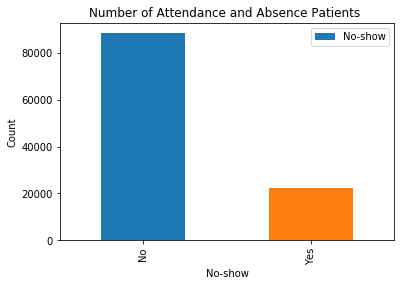

In [82]:
df['No-show'].value_counts().plot(kind='bar')
plt.title('Number of Attendance and Absence Patients ')
plt.xlabel('No-show')
plt.ylabel('Count');
plt.legend()

I splitted the dataset into 2 categories in order to analyze different factors separately on the show-up and no show-up based on the addressed questions and make the investigation more clear. 

In [83]:
# this dataframe contains the patients who attend their appointments.
Show=df['No-show']=='No'
df_Show=df[Show]

In [84]:
## this dataframe contains the patients who absent from their appointments.
Notshow=df['No-show']=='Yes'
df_Notshow=df[Notshow]

### 1- How the duration between the schedule date and appointment date influnce on the appointment show-up?

First I need to extract the duration between schedule date and appointment date in order to analyze its affect on the show up.

In [69]:
df['Difference']=df['AppointmentDate']-df['ScheduleDate']

Check the data with 'Difference' column:

In [70]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,AppointmentDate,Difference
0,62,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0 days
1,56,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days
2,62,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days
3,8,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days
4,56,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0 days


The following cell verify if there is any invalid values (negative values) of 'Difference':

In [71]:
df.loc[df['Difference'] < '0 days'  ]


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,AppointmentDate,Difference
27033,38,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09,-1 days
55226,19,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17,-1 days
64175,22,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04,-1 days
71533,81,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05,-6 days
72362,7,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03,-1 days


The results show that there are 5 rows have negative value of 'Difference' columns and need to be removed since the data of 'ScheduleDate' and 'AppointmentDate' is not accurate:

In [72]:
df.drop([71533,27033,55226,64175,72362] ,axis=0, inplace=True)

Verify the drop process:

In [73]:
df.loc[df['Difference'] < '0 days'  ]

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,AppointmentDate,Difference


I will categorize the 'Difference' column value into groups to facilitate the analysis and make the charts more realizable.

In [77]:
#Put values into groups
Same_day= df['Difference'] =='0 days'
week= (df['Difference'] >'0 days') & (df['Difference'] <='7 days')
Two_weeks= (df['Difference']<= '14 days' )&(df['Difference'] > '7 days')
Three_weeks= (df['Difference'] > '14 days' )&(df['Difference'] <= '21 days') 
Month= (df['Difference']> '21 days' )& (df['Difference']<= '30 days')
Two_months= (df['Difference']> '30 days' )& ( df['Difference'] <= '60 days')
Three_months=( df['Difference']> '60 days') & (df['Difference'] <= '90 days')
More= df['Difference']> '90 days'

# assign the appropriate category to each group of values:

df.loc[Same_day, 'Duration']='SameDay'
df.loc[week, 'Duration']='Week'
df.loc[Two_weeks, 'Duration']='2weeks'
df.loc[Three_weeks, 'Duration']='3weeks'
df.loc[Month, 'Duration']='Month'
df.loc[Two_months, 'Duration']='2Months'
df.loc[Three_months, 'Duration']='3Months'
df.loc[More, 'Duration']='More'


The following function display the unique values of the 'Duration' column and ensure that every value of 'Difference' column has been categorize:

In [78]:
df['Duration'].unique()

array(['SameDay', 'Week', '2weeks', 'Month', '3weeks', '2Months',
       '3Months', 'More'], dtype=object)

check sample of data to check 'Duration' column:

In [79]:
df.sample(5)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,AppointmentDate,Difference,Duration
85568,45,0,1,1,0,0,0,No,2016-06-08,2016-06-08,0 days,SameDay
65204,1,0,0,0,0,0,0,No,2016-05-31,2016-05-31,0 days,SameDay
30786,41,0,0,0,0,0,0,No,2016-05-04,2016-05-06,2 days,Week
32180,73,0,0,0,0,0,1,No,2016-04-19,2016-05-03,14 days,2weeks
106026,63,0,1,0,0,0,0,No,2016-06-06,2016-06-06,0 days,SameDay


check the dimention after adding 'Difference' and 'Duration' column:

In [80]:
df.shape

(110514, 12)

The following code visualize the number of tttendance per duration to measure its effect:

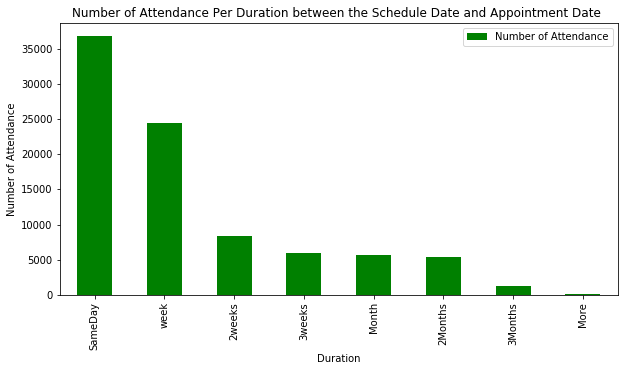

In [39]:
df_Show['Duration'].value_counts().plot( kind='bar',figsize=(10,5), color='green',label='Number of Attendance', x='No-show',y='Duration')
plt.title('Number of Attendance Per Duration between the Schedule Date and Appointment Date ')
plt.xlabel('Duration')
plt.ylabel('Number of Attendance')
plt.legend()

The patients who have thier appointments in the same day of the schedule day have the highiest number of attendance. The longer the duration, the lower the number of attendees. Therefore, the duration between schedule date and appointment date has inverse relationship with the attendance.

The following cell visualize the relationship between duration factor and absence issue:

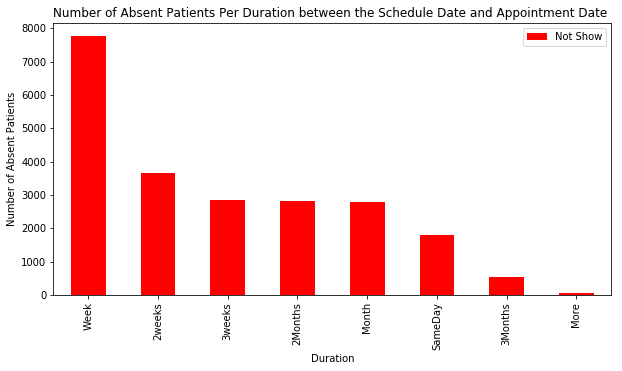

In [91]:
df_Notshow['Duration'].value_counts().plot(kind='bar', figsize=(10,5), color='red',label='Not Show')
plt.title('Number of Absent Patients Per Duration between the Schedule Date and Appointment Date ')
plt.xlabel('Duration')
plt.ylabel('Number of Absent Patients')
plt.legend()

The number of patients who are absent in the same day of scheduling the appointment are less compared with those who have thier appointments after that day, where it comes in the third place. Then, the 'early scheduling with 0 day' duration play a role in increasing attendance and reducing absenteeism.

### 2- Is sending messeges to the patient associated with lower rate of no show-up (absenteeism)?

The following cell visualize the relationship between sending messeges factor and absenteeism:

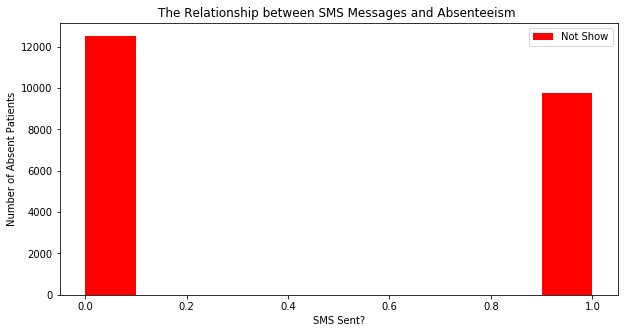

In [99]:
df_Notshow['SMS_received'].plot(kind='hist', label='Not Show', color='red', figsize=(10,5))
plt.title('The Relationship between SMS Messages and Absenteeism ')
plt.xlabel('SMS Sent?')
plt.ylabel('Number of Absent Patients')
plt.legend()

Although the number of patients who have recieved sms messages and not showed up is high, but the number of others who have not recieved any messages is exceeded. So, this factor have light effect in the no show up issue.

### 3- Does the handicap factor leads to high rate of no show-up? how scholarship factor effect on the appontments' show up for patients with handicap?

The following function display the number of patients who have presented and absent in spite of thier handicap, in addition to  the number of patients without handicap who have presented and absent. It group the data by the column 'Hancap' and counts each value of 'No-show' column:

In [100]:
df.groupby('Handcap')['No-show'].value_counts()

Handcap  No-show
0        No         86370
         Yes        21909
1        No          1833
         Yes          402
Name: No-show, dtype: int64

The following cell visualize whether the handicap prevent the patients from attending their appointments

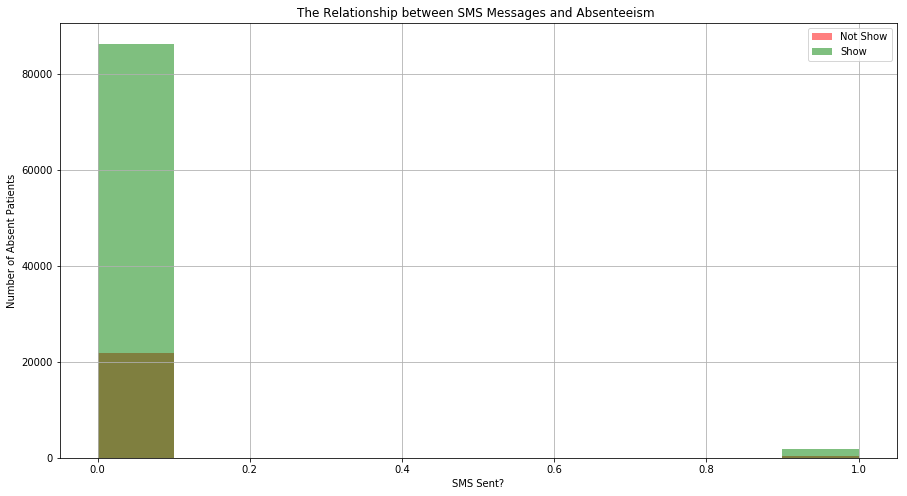

In [104]:
df_Notshow['Handcap'].hist(alpha=0.5, label='Not Show', color='red', figsize=(15,8))
df_Show['Handcap'].hist(alpha=0.5, label='Show', color='green', figsize=(15,8))
plt.title('The Relationship between SMS Messages and Absenteeism ')
plt.xlabel('SMS Sent?')
plt.ylabel('Number of Absent Patients')
plt.legend()

obviously, the patients without handicap are have the big number in the no show up category as well as in the show up category, and the patients with handicap are have the less number in the no show up category as well as in the show up category, So, it didn't prevent the patients from attending the appointments and in the same time it didn't affect patients by making them more committed to attendance. Then, handicap factor almost has no influnce on the show up issue. 

Lets check whether the Scholarship factor has any effect on the appontments' show up for the patients with handicap:

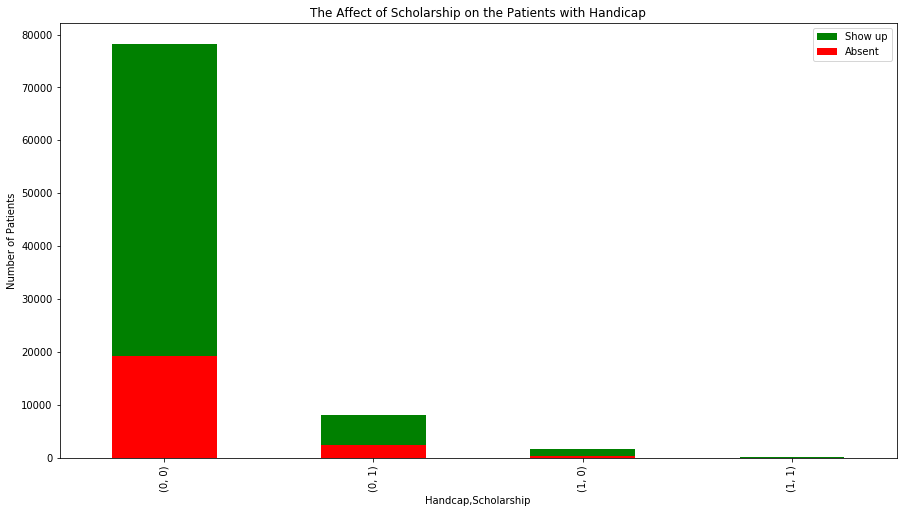

In [108]:
df_Show.groupby(['Handcap','Scholarship'])['No-show'].count().plot(kind='bar', figsize=(15,8), color='green', label='Show up')
df_Notshow.groupby(['Handcap','Scholarship'])['No-show'].count().plot(kind='bar', figsize=(15,8), color='red', label='Absent')
plt.title('The Affect of Scholarship on the Patients with Handicap')
plt.ylabel('Number of Patients')
plt.legend()

The patients with handicap and have scolarship are the lower in attendance and absence the the patients with handicap and have no scolarship, while the The patients without handicap and scolarship are the highest number in attendance and absence. Therefore, the scholar ship factor have no effect on the show up rate. 

### 4- Does the patient's health status ( Hipertension ,Diabetes, and Alcoholism) affect their commitment to attend appointments? how Scholarship factor effect on the appontments' show up for patients with history of diseas?

The following code display the relationship between health status and show up

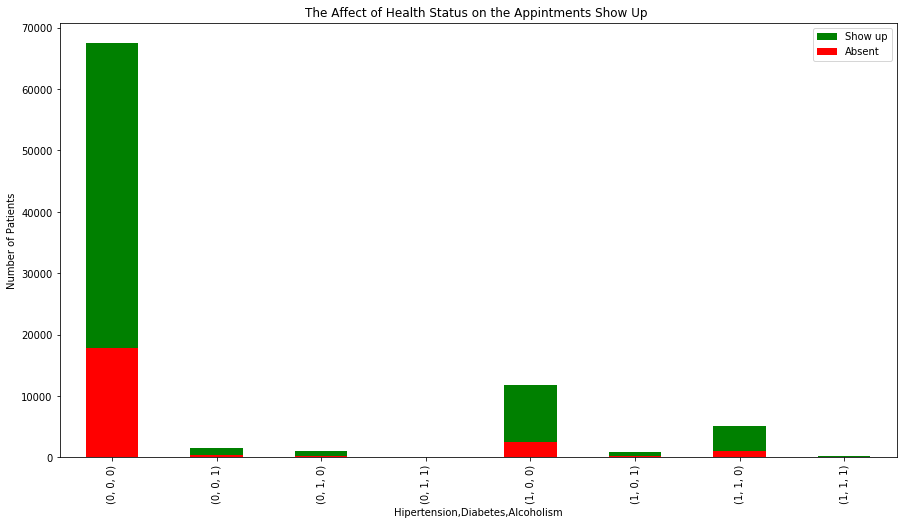

In [102]:
df_Show.groupby(['Hipertension','Diabetes','Alcoholism'])['No-show'].count().plot(kind='bar', figsize=(15,8), color='green', label='Show up')
df_Notshow.groupby(['Hipertension','Diabetes','Alcoholism'])['No-show'].count().plot(kind='bar', figsize=(15,8), color='red', label='Absent')
plt.title('The Affect of Health Status on the Appintments Show Up ')
plt.ylabel('Number of Patients')
plt.legend()

it is cleared that the patients with good health status are more committed to attendance as well as they are also have the big number in the no show up. Patients with Hipertension are comes in the second place for both no show up and show up and others also behave similar for both no show up and show up. Hence, I can say these factors are not have a significant influnce on no show up or show up that lead to correct predication of the appointments' show up. 

Lets check whether the Scholarship factor has any effect on the appontments' show up if they come along with  mentioned health status factors

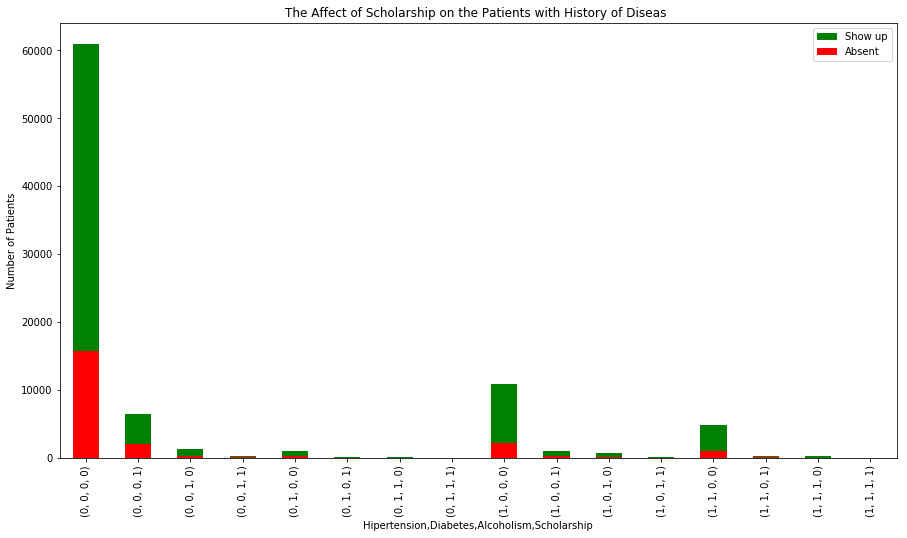

In [48]:
df_Show.groupby(['Hipertension','Diabetes','Alcoholism','Scholarship'])['No-show'].count().plot(kind='bar', figsize=(15,8), color='green', label='Show up')
df_Notshow.groupby(['Hipertension','Diabetes','Alcoholism','Scholarship'])['No-show'].count().plot(kind='bar', figsize=(15,8), color='red', label='Absent')
plt.title('The Affect of Scholarship on the Patients with History of Diseas')
plt.ylabel('Number of Patients')
plt.legend()

The scolarship have the same effect on both show up and absence. The patients who suffer at least one of the mentioned deseaces and have scholarship are less than the patients who have suffer at least one of the mentioned deseaces and have no scholarship for both show up and not show up categories. The patients who are in a good state and whithout scolarship are hold the big number of both show up abd absence. Hence, the 'Scolarship' factor is not playing a role in reduce the number of patients with at least one of the mentioned deseaces from absence.

### 5- How the 'Age' factor impact on the attendance and absenteeism rate?

In [60]:
df_Notshow.Age.describe()

count    22314.000000
mean        34.317872
std         21.965009
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [61]:
df_Show.Age.describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

The statistical results of describe function for both 'show' and 'Notshow' categories are almost close. The mean age of attendance and absence is in the range of 34 - 37 years, so I can't say that the youth patients are more attend or more absent. Also, 75% of present patients are have 56 years and 75% of the absent patients are have 51 years. The resukts of 50% and 25% are also almost close for both show and no show patients. So, it is clear that there is no big difference in the results between both categories and the 'Age' factor doesn't influnce on the show up rate. 

<a id='conclusions'></a>
## Conclusions

Based on the analysis results, the duration between the schedule and appointment day is the most factor that effect on the rate of show up and no show up. Early scheduling of appintments lead to high rate of show up and reduce the number of absent patients. SMS messeges come secondly in terms of impact on show up and no show up among other factors. the factors: (Handcap, Age, Hipertension, Diabetes, Alcoholism, Scholarship) have no influnce in sloving the no show up issue as they are have the same impact on show up and no show categories. 

#### Limitations:
I analyzed the most important factors and the following factors are not analyzed (Gender, Neighborhood) as they not part of the addressed questions.
The times of appointments is not provided in the dataset and I think it would play role in predicting the times (morning, noon, afternoon, evening) that has high rate of attendance and absence.


In [109]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0